# **Uso de Tecnologías, Bienestar y Productividad: Un estudio exploratorio con datos**

# **Presentación del proyecto**

## **Abstracto con Motivación y Audiencia**

**Abstracto**

En la era digital actual, el uso intensivo de las redes sociales se ha convertido en una práctica común que impacta diversos aspectos de la vida diaria, incluyendo la productividad laboral. Este proyecto tiene como objetivo principal analizar cómo se ve afectado el nivel real de productividad (actual_productivity_score) en función de factores sociodemográficos (edad, género, tipo de trabajo), hábitos digitales (tiempo diario en redes sociales, uso de aplicaciones de enfoque, bienestar digital), y variables relacionadas con el bienestar personal (estrés, sueño, consumo de café, burnout). A través de un enfoque cuantitativo, se busca identificar patrones y relaciones que permitan comprender el impacto de estos elementos en el desempeño laboral y el equilibrio personal, aportando información valiosa para futuras estrategias de mejora del bienestar digital y profesional.

**Motivación**

 Este estudio responde a la necesidad de ofrecer evidencia basada en datos para diseñar estrategias y herramientas que permitan optimizar el equilibrio entre la vida digital y el desempeño profesional, contribuyendo a la reducción del estrés, el burnout y la mejora del bienestar laboral.

**Audiencia**

Este proyecto está dirigido a investigadores en psicología organizacional, recursos humanos, desarrolladores de aplicaciones de bienestar digital, y profesionales interesados en mejorar la productividad y calidad de vida en entornos laborales altamente digitalizados. Además, es útil para diseñadores de políticas corporativas que busquen implementar intervenciones efectivas para la gestión del tiempo en redes sociales y el fomento de hábitos saludables.

## **Contexto Comercial y Analítico**

Desde el **contexto comercial** este estudio podría contribuir:

* Recursos Humanos: identificar patrones que reduzcan la productividad real y generar políticas para mejorar el rendimiento (por ejemplo, control de notificaciones, pausas activas, fomentar foco digital).

* Plataformas de productividad (como Notion, Trello, Forest): entender el impacto de las apps de enfoque o bienestar digital en el desempeño.

* Empresas de tecnología o consultoras: ofrecer soluciones basadas en datos sobre hábitos digitales y productividad.

* Salud organizacional: estrategias para reducir burnout y mejorar el bienestar laboral.


Desde el **contexto analítico**  como punto de vista técnico o de ciencia de datos, este estudio se ubica:

* Modelado predictivo (regresión): para estimar *actual_productivity_score*.

* Análisis exploratorio de hábitos digitales: para descubrir correlaciones, distribuciones, patrones ocultos.

* Estudio multivariado del bienestar digital: cómo interaccionan factores como estrés, sueño y redes sociales en relación con el rendimiento.

## **Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

La hipótesis principal de este trabajo se centra en probar:

*El tiempo diario dedicado a redes sociales, junto con factores relacionados al bienestar digital (como el uso de aplicaciones de enfoque, nivel de sueño y estrés), impacta significativamente en la productividad real (actual_productivity_score) de los individuos*

**Otros objetivos análiticos de este trabajo sera probar:**

* Un mayor tiempo en redes sociales se asocia con una menor productividad

* Existen diferencias en la productividad según el tipo de trabajo o género

* El uso de apps de enfoque o tener activado el bienestar digital se asocia con una mayor productividad

* Altos niveles de estrés, pocas horas de sueño y elevado consumo de café podrían correlacionarse negativamente con la productividad

* Las personas tienden a sobreestimar su rendimiento, mostrando diferencias importantes entre ambas métricas

## **Objetivo**

El objetivo principal de este proyecto es analizar cómo el uso de redes sociales y otros hábitos digitales influyen en la productividad real de las personas. A partir de un conjunto de datos que incluye variables relacionadas con el tiempo en redes sociales, notificaciones, sueño, estrés, pausas laborales, uso de herramientas de enfoque y bienestar digital, se busca construir un modelo de regresión que permita predecir el nivel de productividad ***(actual_productivity_score)***




# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [1]:
import pandas as pd
import missingno as msno #para visualizar nulls
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import mode
import numpy as np

**Configuración del entorno de Python en Google Colab**

In [2]:
#Setear el ID del archivo dentro mi G.Drive (Previo di permisos para que se pueda acceder como lector al enlace)

#el id del archivo en mi g.drive
id = "1Ja8_p6U1XxjkApx9rfezaGUM_qjLsbIo"

#Forma genérica de entrar al archivo en drive + el id
url = f'https://drive.google.com/uc?id={id}'

**Lectura del dataset**

In [3]:
df = pd.read_csv(url)

df.head()

age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                      NaN   
3   60  Female  Unemployed                      NaN   
4   25    Male          IT                      NaN   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1                      5.063368                   5.165093           7.0   
2                      3.861762                   3.474053           4.0   
3                      2.916331                   1.774869           6.0   
4                      8.868753                        NaN           7.0   

   sleep_hours  screen_time_before_sleep  breaks_during_work  uses_focus_apps  \
0     5.116546                  0.419102                   8            False   
1     5.103897                  0.671519                   7             True   
2     8.583222                  0.624378                   0             True   
3     6.052984                  1.204540                   1            False   
4     5.405706                  1.876254                   1            False   

   has_digital_wellbeing_enabled  coffee_consumption_per_day  \
0                          False                           4   
1                           True                           2   
2                          False                           3   
3                          False                           0   
4                           True                           1   

   days_feeling_burnout_per_month  weekly_offline_hours  \
0                              11             21.927072   
1                              25              0.000000   
2                              17             10.322044   
3                               4             23.876616   
4                              30             10.653519   

   job_satisfaction_score  
0                6.336688  
1                3.412427  
2                2.474944  
3                1.733670  
4                9.693060

**Análisis inicial del dataset**

In [4]:
#Forma
print("--------------------------------Shape----------------------------------------------")
print(df.shape)


#Columnas
print("--------------------------------Columnas--------------------------------------------")
print(df.columns)


--------------------------------Shape----------------------------------------------
(30000, 19)
--------------------------------Columnas--------------------------------------------
Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'weekly_offline_hours',
       'job_satisfaction_score'],
      dtype='object')


In [5]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

**Descripción de variables**

In [6]:
#describe variables númericas
df.describe().T

count       mean        std        min  \
age                             30000.0  41.486867  13.835221  18.000000   
daily_social_media_time         27235.0   3.113418   2.074813   0.000000   
number_of_notifications         30000.0  59.958767   7.723772  30.000000   
work_hours_per_day              30000.0   6.990792   1.997736   0.000000   
perceived_productivity_score    28386.0   5.510488   2.023470   2.000252   
actual_productivity_score       27635.0   4.951805   1.883378   0.296812   
stress_level                    28096.0   5.514059   2.866344   1.000000   
sleep_hours                     27402.0   6.500247   1.464004   3.000000   
screen_time_before_sleep        27789.0   1.025568   0.653355   0.000000   
breaks_during_work              30000.0   4.992200   3.173737   0.000000   
coffee_consumption_per_day      30000.0   1.999300   1.410047   0.000000   
days_feeling_burnout_per_month  30000.0  15.557067   9.252956   0.000000   
weekly_offline_hours            30000.0  10.360655   7.280415   0.000000   
job_satisfaction_score          27270.0   4.964901   2.121194   0.000000   

                                      25%        50%        75%        max  
age                             30.000000  41.000000  53.000000  65.000000  
daily_social_media_time          1.639566   3.025913   4.368917  17.973256  
number_of_notifications         55.000000  60.000000  65.000000  90.000000  
work_hours_per_day               5.643771   6.990641   8.354725  12.000000  
perceived_productivity_score     3.757861   5.525005   7.265776   8.999376  
actual_productivity_score        3.373284   4.951742   6.526342   9.846258  
stress_level                     3.000000   6.000000   8.000000  10.000000  
sleep_hours                      5.493536   6.498340   7.504143  10.000000  
screen_time_before_sleep         0.528490   1.006159   1.477221   3.000000  
breaks_during_work               2.000000   5.000000   8.000000  10.000000  
coffee_consumption_per_day       1.000000   2.000000   3.000000  10.000000  
days_feeling_burnout_per_month   8.000000  16.000000  24.000000  31.000000  
weekly_offline_hours             4.541872  10.013677  15.300809  40.964769  
job_satisfaction_score           3.363580   4.951049   6.581323  10.000000

In [7]:
#describe variables Categóricas
df.describe(include="object").T

count unique        top   freq
gender                      30000      3       Male  14452
job_type                    30000      6  Education   5055
social_platform_preference  30000      5     TikTok   6096

- **age**: Edad del individuo (18–65 años)  
- **gender**: Identidad de género: Masculino, Femenino u Otro  
- **job_type**: Sector laboral o situación laboral (TI, Educación, Estudiante, etc.)  
- **daily_social_media_time**: Tiempo promedio diario dedicado a redes sociales (en horas)  
- **social_platform_preference**: Plataforma social más utilizada (Instagram, TikTok, Telegram, etc.)  
- **number_of_notifications**: Número de notificaciones móviles/sociales por día  
- **work_hours_per_day**: Promedio de horas trabajadas por día  
- **perceived_productivity_score**: Puntaje de productividad percibida (escala de 0 a 10)  
- **actual_productivity_score**: Puntaje simulado de productividad real (escala de 0 a 10)  
- **stress_level**: Nivel actual de estrés (escala de 1 a 10)  
- **sleep_hours**: Promedio de horas de sueño por noche  
- **screen_time_before_sleep**: Tiempo en pantalla antes de dormir (en horas)  
- **breaks_during_work**: Número de pausas realizadas durante la jornada laboral  
- **uses_focus_apps**: Si utiliza aplicaciones digitales para concentración (Verdadero/Falso)  
- **has_digital_wellbeing_enabled**: Si tiene activada la función de Bienestar Digital (Verdadero/Falso)  
- **coffee_consumption_per_day**: Número de tazas de café consumidas por día  
- **days_feeling_burnout_per_month**: Número de días al mes en que se sintió agotado(a) o quemado(a) laboralmente
- **weekly_offline_hours**: Total de horas offline por semana (excluyendo el sueño)  
- **job_satisfaction_score**: Nivel de satisfacción con el trabajo/responsabilidades (escala de 0 a 10)


#### Variables
#### Variables Numéricas Continuas:

* **daily_social_media_time** (Razón)
* **work_hours_per_day** (Razón)
* **perceived_productivity_score** (Ordinal) (Son como calificaciones)
* **actual_productivity_score** (Ordinal) (Son como calificaciones)
* **stress_level** (Ordinal) (Son como calificaciones)
* **sleep_hours** (Razón)
* **screen_time_before_sleep** (Razón)
* **weekly_offline_hours** (Razón)
* **job_satisfaction_score** (Ordinal) (Son como calificaciones)

#### Variables Numéricas Discretas:
* **age** (Intervalo): Si bien la edad puede ser considerada continua (años,meses y dias de vida), en este DataSet se encuentra expresada en años enteros.
* **number_of_notifications** (Razón)
* **breaks_during_work** (Razón)
* **coffee_consumption_per_day** (Razón)
* **days_feeling_burnout_per_month** (Razón)
* **uses_focus_apps** (Boolena) (Nominal)
* **has_digital_wellbeing_enabled**(Booleana) (Nominal)

#### Variables Categóricas

* **gender** (Nominal)
* **job_type** (Nominal)
* **social_platform_preference** (Nominal)

# **Data Wrangling: Limpieza y transformación de datos**

## *Notas*

**url para colores matplot** https://matplotlib.org/stable/gallery/color/named_colors.html

**Web para seleccionar gráficos a realizar**: https://www.data-to-viz.com/

## **Valores duplicados**

In [8]:
duplis = df.duplicated().sum()

print(f"El DataSet tiene {duplis} valores duplicados" )

El DataSet tiene 0 valores duplicados


## **Valores nulos**

In [9]:
forma = df.shape
total_filas = forma[0]
nulos = df.isna().sum()

for c in df.columns:
    cantidad_nulos = nulos[c]
    porcentaje = (cantidad_nulos / total_filas) * 100
    print(f"La columna '{c}' tiene {cantidad_nulos} valores nulos, lo que representa un {porcentaje:.2f}% del total de registros.")

La columna 'age' tiene 0 valores nulos, lo que representa un 0.00% del total de registros.
La columna 'gender' tiene 0 valores nulos, lo que representa un 0.00% del total de registros.
La columna 'job_type' tiene 0 valores nulos, lo que representa un 0.00% del total de registros.
La columna 'daily_social_media_time' tiene 2765 valores nulos, lo que representa un 9.22% del total de registros.
La columna 'social_platform_preference' tiene 0 valores nulos, lo que representa un 0.00% del total de registros.
La columna 'number_of_notifications' tiene 0 valores nulos, lo que representa un 0.00% del total de registros.
La columna 'work_hours_per_day' tiene 0 valores nulos, lo que representa un 0.00% del total de registros.
La columna 'perceived_productivity_score' tiene 1614 valores nulos, lo que representa un 5.38% del total de registros.
La columna 'actual_productivity_score' tiene 2365 valores nulos, lo que representa un 7.88% del total de registros.
La columna 'stress_level' tiene 1904 va

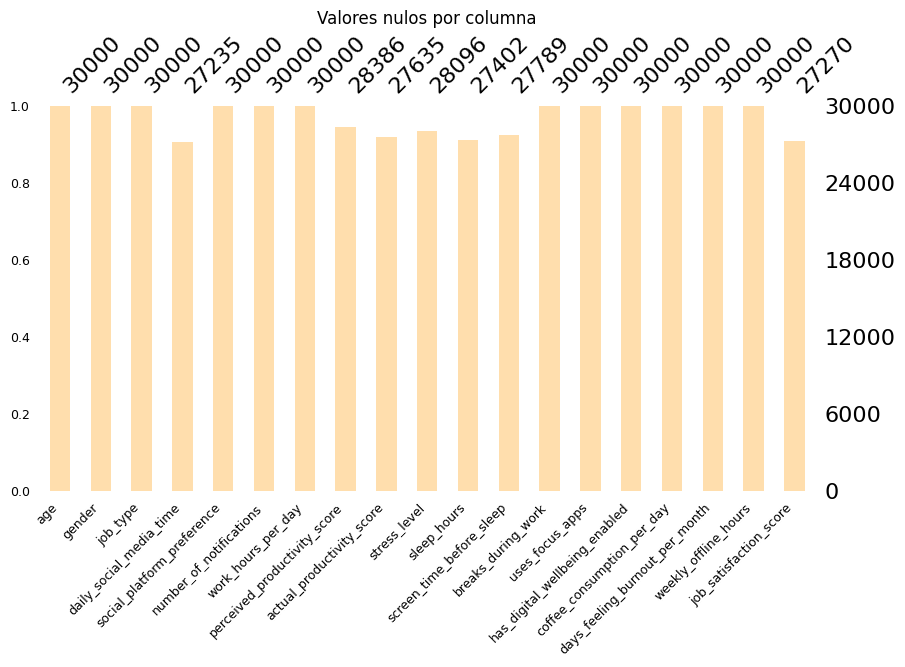

In [10]:
# Gráfico de barras: cantidad de nulos por columna
ax = msno.bar(df, figsize=(10, 5), color='navajowhite')

# Ajustar tamaño de fuente de los ejes
ax.set_title("Valores nulos por columna", fontsize=12)
ax.tick_params(axis='x', labelsize=9)  # Eje X
ax.tick_params(axis='y', labelsize=9)  # Eje Y

plt.show()

In [11]:
#Tratamiento valores nulos: rellenar por la mediana en númericas.

#Variables númericas con nan a rellenar:
# daily_social_media_time
# perceived_productivity_score
# actual_productivity_score
# stress_level
# sleep_hours
# screen_time_before_sleep
# job_satisfaction_score

#la mayoría de estas variables no presentan una distribución simétrica por lo cual y dado que aún no trato outliers, me parece prudente usar mediana por sobre la media.

col_num = df.select_dtypes(include=['float64', 'int64']).columns
for col in col_num:
    df[col] = df[col].fillna(df[col].median())

In [12]:
# rechequar nulos:

df.isna().sum()

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64

## **Valores outliers**

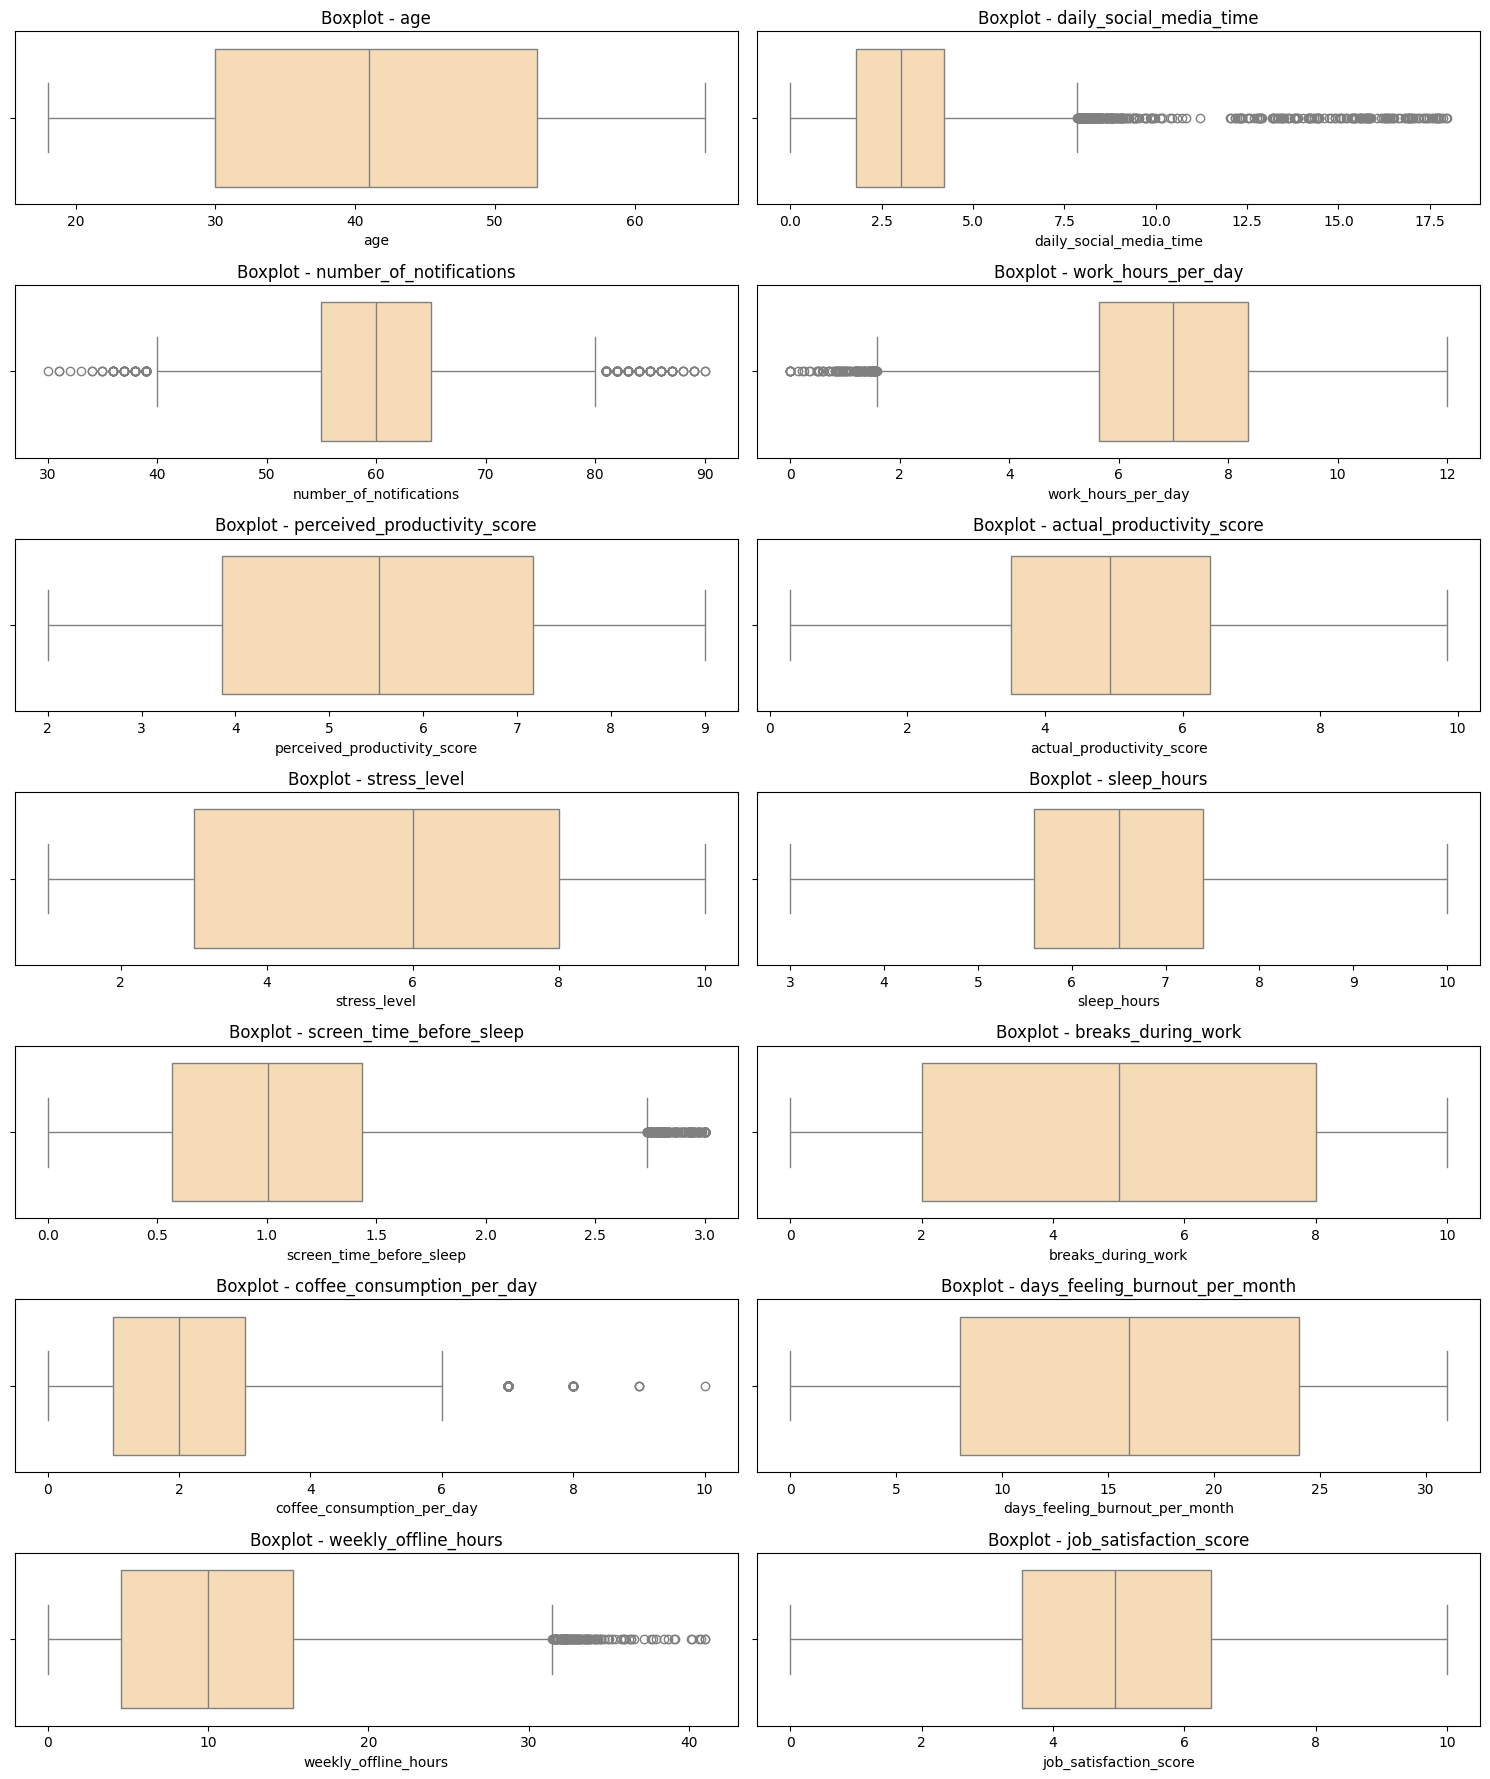

In [13]:
# Seleccionamos solo las variables numéricas
var_numericas = df.select_dtypes(include=['float64', 'int64'])

# Creamos los boxplots para cada variable numérica
plt.figure(figsize=(15, 20))
for i, col in enumerate(var_numericas.columns, 1):
    plt.subplot(len(var_numericas.columns)//2 + 1, 2, i)
    sns.boxplot(x=df[col], color='navajowhite')
    plt.title(f"Boxplot - {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [14]:
#cantidad de outliers por variable: método Z_Score
from scipy.stats import zscore

outliers_zscore = {}

# Aplicamos zscore solo a variables numéricas
z_scores = df[var_numericas.columns].apply(zscore)

for col in var_numericas.columns:
    outlier_mask = (z_scores[col].abs() > 3) # como son valores absolutos toma los desvios en +/- 3 desv std de la media.
    outliers_zscore[col] = df[col][outlier_mask]
    print(f"Outliers en {col} (z-score): {outlier_mask.sum()}")


Outliers en age (z-score): 0
Outliers en daily_social_media_time (z-score): 180
Outliers en number_of_notifications (z-score): 84
Outliers en work_hours_per_day (z-score): 36
Outliers en perceived_productivity_score (z-score): 0
Outliers en actual_productivity_score (z-score): 0
Outliers en stress_level (z-score): 0
Outliers en sleep_hours (z-score): 0
Outliers en screen_time_before_sleep (z-score): 93
Outliers en breaks_during_work (z-score): 0
Outliers en coffee_consumption_per_day (z-score): 127
Outliers en days_feeling_burnout_per_month (z-score): 0
Outliers en weekly_offline_hours (z-score): 88
Outliers en job_satisfaction_score (z-score): 0


In [15]:
# tratamiento outliers
# daily_social_media_time:
"""Contiene el mayor número de outliers, ubicados cerca del valor máximo extremo. Dado que representa horas de uso diario de redes sociales,
resulta razonable descartar los valores extremadamente altos, que probablemente no reflejen un uso habitual ni saludable.
 La mediana se alinea con el criterio utilizado para rellenar valores nulos"""

# works hour per day:
"""Existen outliers cercanos a las 0 horas laborales diarias. Dado que la variable refleja la jornada laboral,
es prudente eliminar casos que no registran ni una jornada mínima.
Usar la mediana permite mantener la consistencia con el tratamiento de nulos previo y evitar sesgos por valores extremos"""

# number_of_notifications
"""La distribución es aproximadamente normal, y los outliers son escasos.
La media es una buena medida de tendencia central aquí,
ya que los valores extremos no distorsionan significativamente los resultados.
Esto permite suavizar casos atípicos sin perder representatividad"""

# coffee_consumption_per_day
"""Aunque los extremos podrían ser reales, valores de consumo excesivo de café pueden ser nocivos y no representativos del promedio de la población.
La mediana permite reducir el impacto de estos valores sin eliminar completamente la variabilidad"""

# screen_time_before_sleep
""" No reemplazar
Aunque existen valores altos (hasta 3 horas), estos son plausibles en contextos como ver películas o consumir contenido en streaming.
Al no comprometer la integridad de la variable, se opta por conservar estos casos"""

# weekly_offline_hours
""" No reemplazar
Los valores extremos en esta variable podrían reflejar fines de semana sin conectividad, vacaciones, o desintoxicación digital voluntaria.
Dado que son comportamientos posibles y no necesariamente erróneos, se decide conservar estos valores"""


' No reemplazar\nLos valores extremos en esta variable podrían reflejar fines de semana sin conectividad, vacaciones, o desintoxicación digital voluntaria.\nDado que son comportamientos posibles y no necesariamente erróneos, se decide conservar estos valores'

In [16]:
# Copia del DataFrame para trabajar sin modificar el original
df_limpia = df.copy()

# Diccionario con el método de reemplazo para cada variable
reemplazo_outliers = {
    'daily_social_media_time': 'mediana',
    'work_hours_per_day': 'mediana',
    'number_of_notifications': 'media',
    'coffee_consumption_per_day': 'mediana',
    'screen_time_before_sleep': 'no',
    'weekly_offline_hours': 'no'
}

# Umbral de Z-score típico
z_umbral = 3

for col, metodo in reemplazo_outliers.items():
    # Calculamos el z-score para la columna
    z_scores = zscore(df_limpia[col])

    # Creamos máscara de outliers
    umbral = np.abs(z_scores) > z_umbral

    if metodo == 'mediana':
        valor = round(df_limpia[col].median(),0)
        df_limpia.loc[umbral, col] = valor
        print(f"Outliers en '{col}' reemplazados por la **mediana** ({valor})")

    elif metodo == 'media':
        valor = round(df_limpia[col].mean(),0)
        df_limpia.loc[umbral, col] = valor
        print(f"Outliers en '{col}' reemplazados por la **media** ({valor:.2f})")

    else:
        print(f"Outliers en '{col}' detectados pero **no fueron modificados**")

Outliers en 'daily_social_media_time' reemplazados por la **mediana** (3.0)
Outliers en 'work_hours_per_day' reemplazados por la **mediana** (7.0)
Outliers en 'number_of_notifications' reemplazados por la **media** (60.00)
Outliers en 'coffee_consumption_per_day' reemplazados por la **mediana** (2.0)
Outliers en 'screen_time_before_sleep' detectados pero **no fueron modificados**
Outliers en 'weekly_offline_hours' detectados pero **no fueron modificados**


## **Transformaciones de Fechas/Nombres de variables/Valores**

In [17]:
# realizar un estudios sobre los valores unicos en las variables cateogrias para verificar nombres
vars_cat = ['gender', 'job_type', 'social_platform_preference']

for col in vars_cat:
    print(f"Valores únicos en '{col}':")
    print(df_limpia[col].unique())
    print("-" * 40)


Valores únicos en 'gender':
['Male' 'Female' 'Other']
----------------------------------------
Valores únicos en 'job_type':
['Unemployed' 'Health' 'Finance' 'IT' 'Education' 'Student']
----------------------------------------
Valores únicos en 'social_platform_preference':
['Facebook' 'Twitter' 'Telegram' 'TikTok' 'Instagram']
----------------------------------------


* No existen variables de tipo Date
* Las datos únicos en las variables categorícas son correctos sin problemas ni transformaciones necesarias
* No voy a traducir al español las variables, con el fin de mantener el diccionario de variables original

# **EDA: Análisis Exploratorio de datos**

## **Análisis univariado**

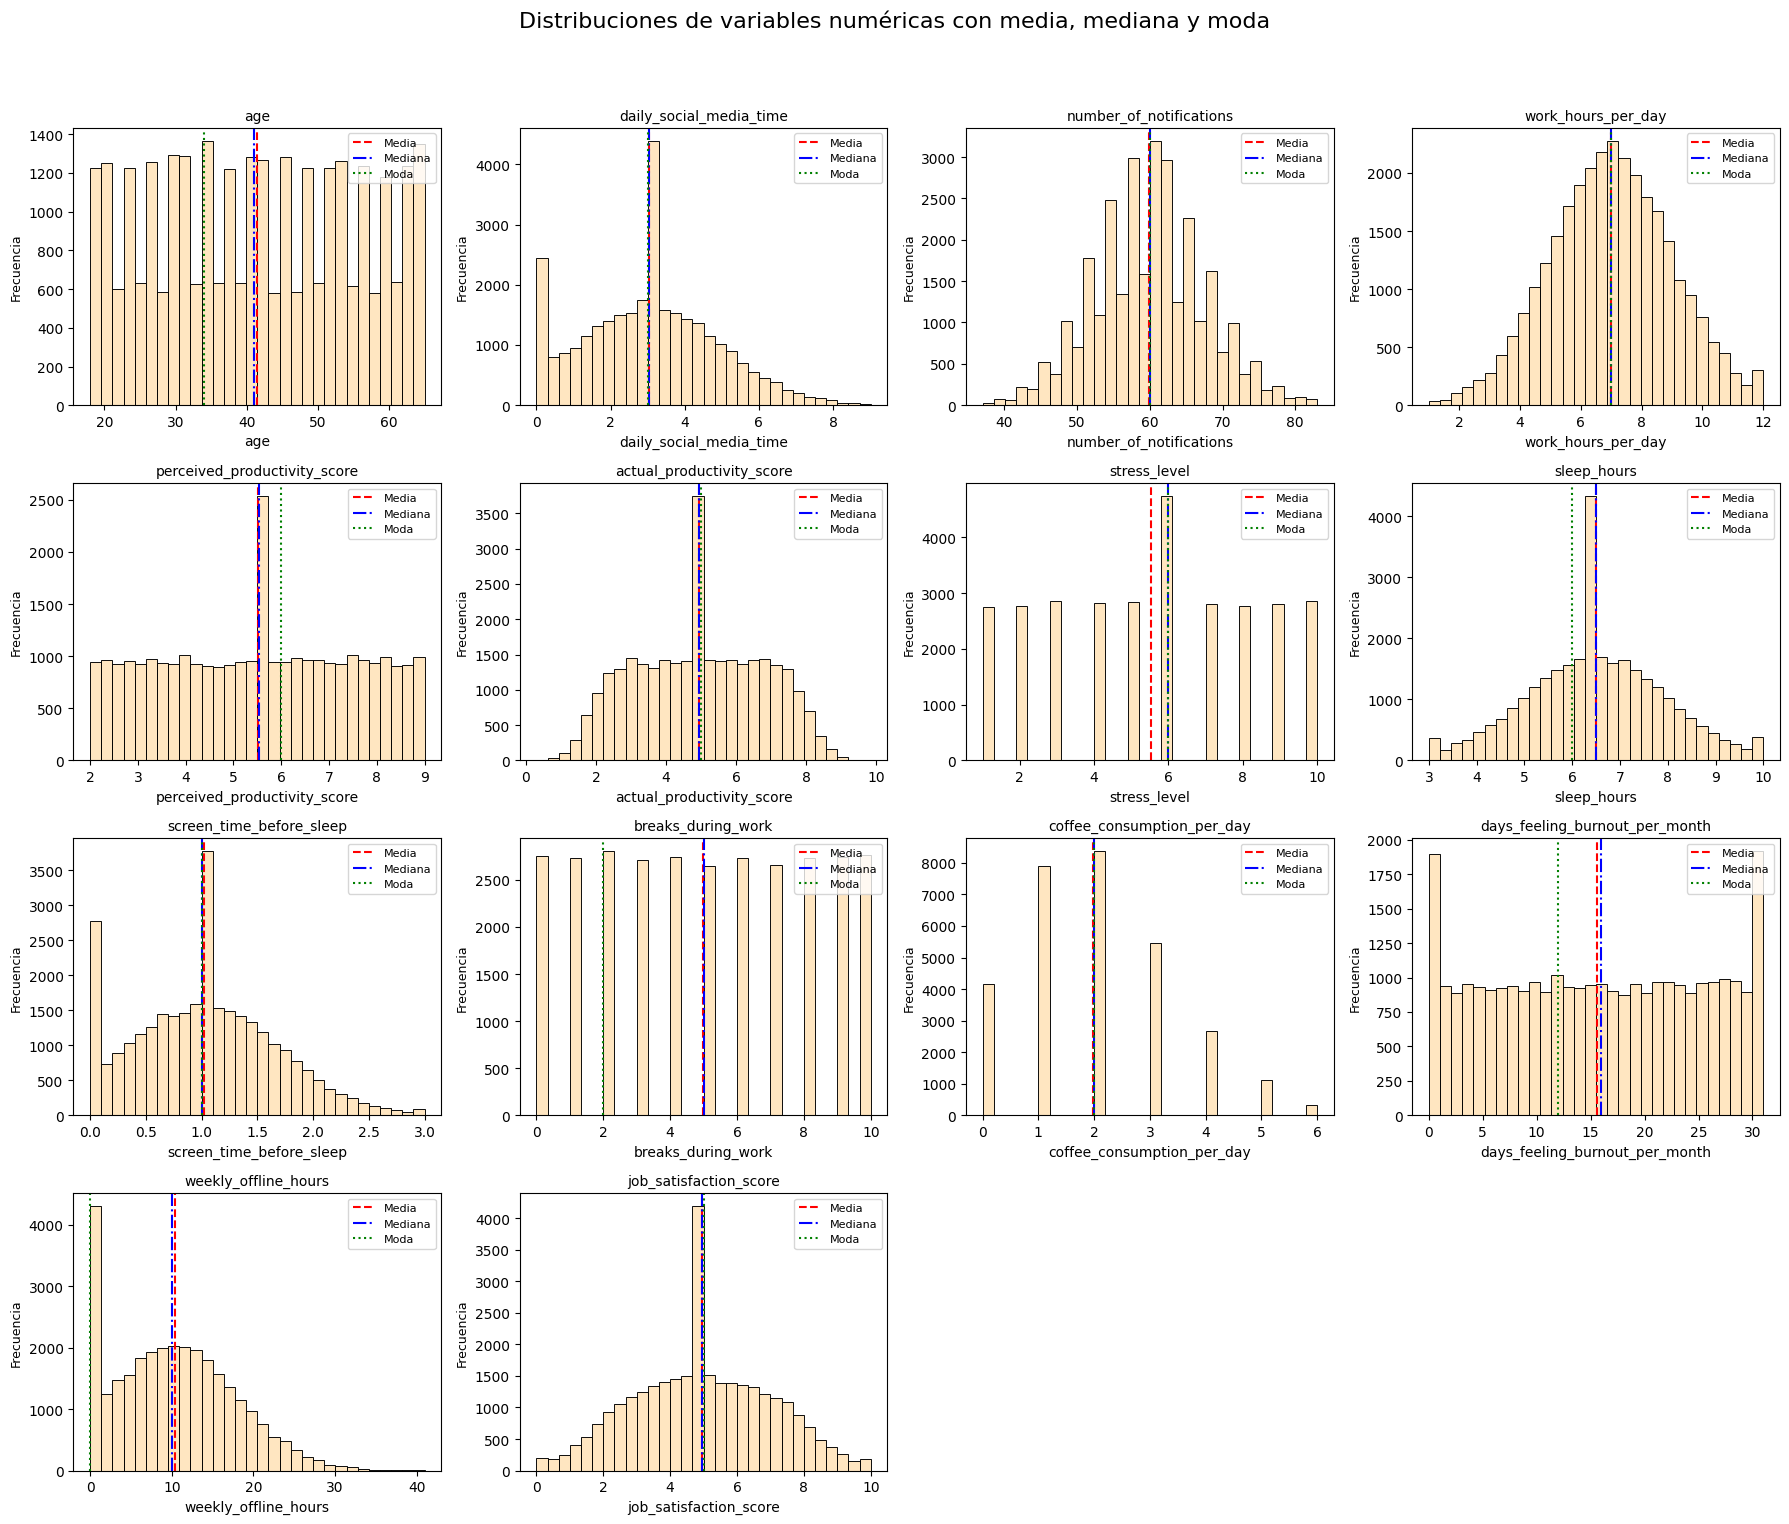

In [18]:
# Seleccionar columnas numéricas
var_numericas = df_limpia.select_dtypes(include=['float64', 'int64'])

# Cantidad de variables
n_vars = len(var_numericas.columns) #son 14. dividir en 4 cols y 4 filas para mejor visual

# Definir filas y columnas necesarias
n_cols = 4
n_rows = int(np.ceil(n_vars / n_cols))

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(var_numericas.columns):
    ax = axes[i]

    # Histograma
    sns.histplot(df_limpia[col], bins=30, color='navajowhite', edgecolor='black', ax=ax)
    ax.set_ylabel('Frecuencia', fontsize=9)

    # Calcular media, mediana, moda
    media_val = df_limpia[col].mean()
    mediana_val = df_limpia[col].median()
    # Determinar moda según el tipo de dato
    if df_limpia[col].dtype == 'float64':
        # Redondeamos para evitar falsos positivos por decimales
        moda_val = df_limpia[col].round().mode()[0]
    else:
        moda_val = mode(df_limpia[col], keepdims=False).mode.item()
    #moda_val = mode(df_limpia[col], keepdims=False).mode.item()

    # Líneas verticales
    ax.axvline(media_val, color='red', linestyle='--', label='Media')
    ax.axvline(mediana_val, color='blue', linestyle='-.', label='Mediana')
    ax.axvline(moda_val, color='green', linestyle=':', label='Moda')

    ax.set_title(col, fontsize=10)
    ax.legend(fontsize=8)

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Títulos y ajustes
plt.suptitle("Distribuciones de variables numéricas con media, mediana y moda", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Insights**

* *daily social media time*: si bien el máximo de de horas dedicado a redes sociales alcanza 0 hs, es seguido de un grupo de usuario que dedican aprox. 3 hs diarias.

* *number of notifications:* El número de notificaciones promedio por día es aprox. 60 notificaciones.

* *works hour per day:* El número de horas trabajadas promedio por día es aprox. 7 hs.

* *perceived productivity score:* El puntaje de productividad percibido es mayor en los extremos cercanos a los valores min/max en comparación del real puntaje de productividad.

* *stress level*: Puede apreciarse una distribucion casi una distribución unifrome. Lo cual denota usuarios con nivel de stress en todos los niveles.

* *sleep hours* La cantidad de horas de sueño promedio ronda entre las 7 a 7,5 hs por día.

* *screen time before sleep:* la mayoría de los usuarios no consume pantallas antes de dormir. Sin embargo existe un grupo de aproximadamente el 50% del anterior que consume al menos 1 hs diaria antes de dormir.

* *breaks during work:* presenta casi una distribución uniforme, por lo cual la cantidad de usuarios que realizan 0 pausas a 10 pausas laborales es similar.

* *coffe consumption per day:* El número de tazas de café máximo es de 2 tazas por día. A partir de este punto comienza a decaer el consumo de café

* *days feeling bornout per month:* Existen usuarios que no se sintieron agotados laboralmente, mientras que otros vivieron agotados todo el mes, siendo muy similares. El resto de los dias del mes, los usuario se distribuyen casi uniformemente.


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_8852\1419615503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_limpia, x=var, palette='pastel')


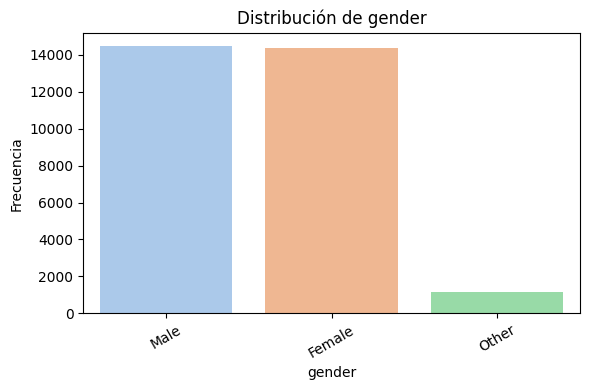

Frecuencia  Proporcion
gender                        
Male         14452        0.48
Female       14370        0.48
Other         1178        0.04

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_8852\1419615503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_limpia, x=var, palette='pastel')


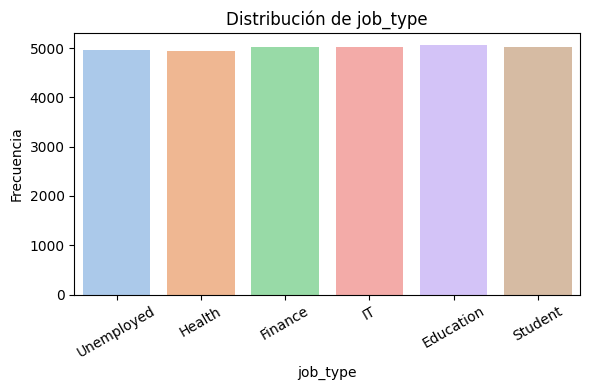

Frecuencia  Proporcion
job_type                          
Education         5055        0.17
IT                5026        0.17
Finance           5017        0.17
Student           5012        0.17
Unemployed        4958        0.17
Health            4932        0.16

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_8852\1419615503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_limpia, x=var, palette='pastel')


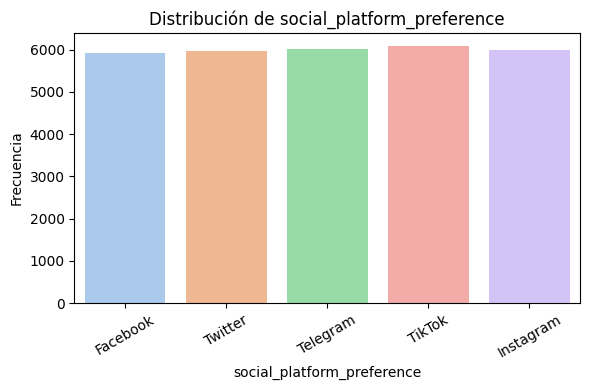

Frecuencia  Proporcion
social_platform_preference                        
TikTok                            6096         0.2
Telegram                          6013         0.2
Instagram                         6006         0.2
Twitter                           5964         0.2
Facebook                          5921         0.2

In [19]:
# variables categóricas
vars_cat = ['gender', 'job_type', 'social_platform_preference']

for var in vars_cat:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_limpia, x=var, palette='pastel')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    #Tabla de referencia cruzada
    display(df[var].value_counts().to_frame(name='Frecuencia').assign(Proporcion=lambda x: (x['Frecuencia']/x['Frecuencia'].sum()).round(2)))

**Insights**

* La preferencia de plataforma social se encuentra levemente marcada por TikTok
* La cantidad de usuarios por tipo de empleo se encuentra leve marcada por personal del sector Educación
* El generó se encuentra concentrado equitativamente en hombres y mujeres. Solo un 4% no se identifica con el género binario. Se encuentra desbalanceada, por lo cual debería considerar eliminar ese 4% ya que no es tan representativo.

## **Análisis bivariado**

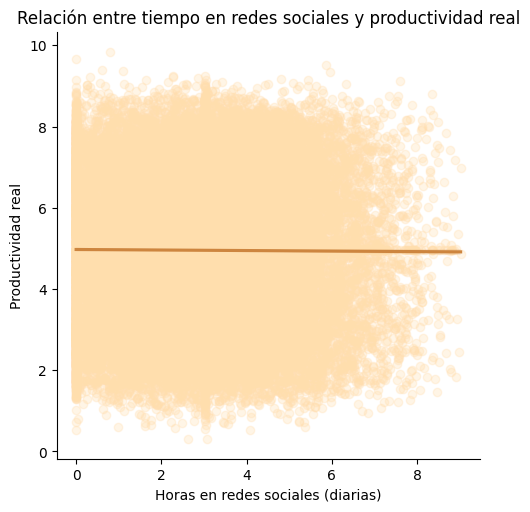

In [20]:
# daily_social_media_time vs  actual_productivity_score (cuantitativa vs cuantitativa)
#  "Un mayor tiempo en redes sociales se asocia con una menor productividad"

# Scatterplot con línea de regresión
sns.lmplot(x='daily_social_media_time', y='actual_productivity_score', data=df_limpia, scatter_kws={'alpha': 0.3, 'color': 'navajowhite'},line_kws={'color': 'peru'})
plt.title('Relación entre tiempo en redes sociales y productividad real')
plt.xlabel('Horas en redes sociales (diarias)')
plt.ylabel('Productividad real')
plt.show()

Podemos apreciar que claremente no existe correlación entre estas variables, por lo cual no podemos afirmar que un incremento en las horas de uso de redes sociales produzca menor productividad. El coef de Pearson entre estas variables debe ser cercano a 0.

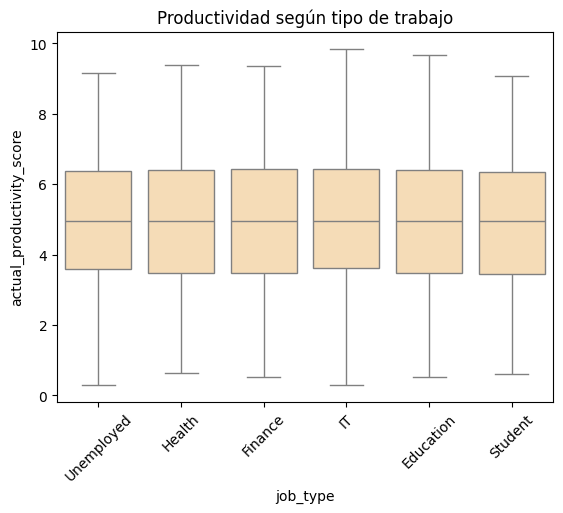

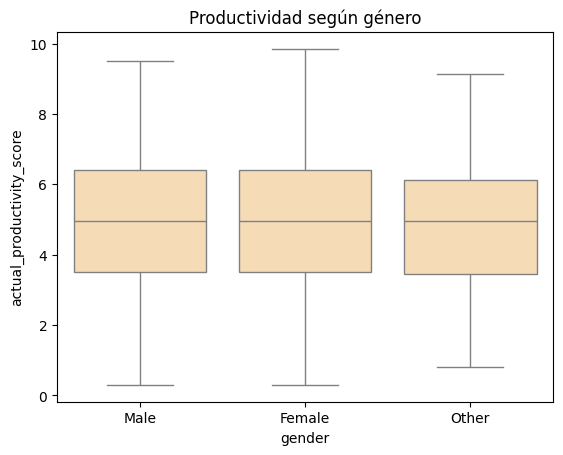

In [21]:
#actual_productivity_score vs job_type y gender (cuantitativa vs categórica)
# "Existen diferencias en la productividad según el tipo de trabajo o género"

# Boxplots por tipo de trabajo
sns.boxplot(x='job_type', y='actual_productivity_score', data=df_limpia, color='navajowhite')
plt.xticks(rotation=45)
plt.title('Productividad según tipo de trabajo')
plt.show()

# Boxplot por género
sns.boxplot(x='gender', y='actual_productivity_score', data=df_limpia,
            color='navajowhite')
plt.title('Productividad según género')
plt.show()


* La media de productividad por trabajo esta en 5 horas para todos los tipos de trabajo. El sector IT presenta un rango intercuartilico mas grande por lo cual podemos esperar valores un poco mas dispersos.

* La media de productividad por trabajo esta en 5 horas para hombres y mujeres. Aquellos no identificados con génergo binario, presentan una media levemente menor como también un IQR mas chico, seguramente con valores no tan dispersos.

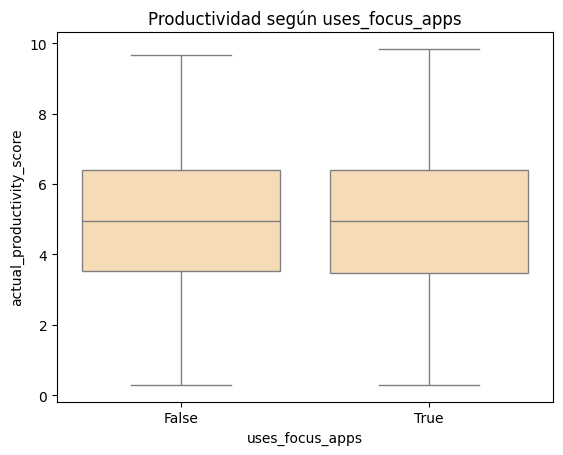

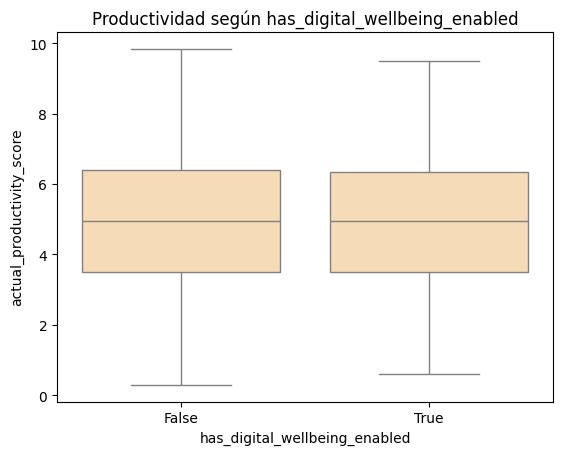

In [22]:
#actual_productivity_score vs focus_app_usage  y digital_wellbeing_enabled (cuantitativa vs binaria)
#"El uso de apps de enfoque o tener activado el bienestar digital se asocia con una mayor productividad"

# Boxplot para ambas variables
for var in ['uses_focus_apps', 'has_digital_wellbeing_enabled']:
    sns.boxplot(x=var, y='actual_productivity_score', data=df_limpia, color='navajowhite')
    plt.title(f'Productividad según {var}')
    plt.show()


* Tanto la media para los que usan o no aplicaciones y aquellos que tienen el bienestar digital activada, presentan una media alrededor de 5.
* Aquellos que usan bienestar digital presentan un IQR menor, seguramente con valores menos dispersos.

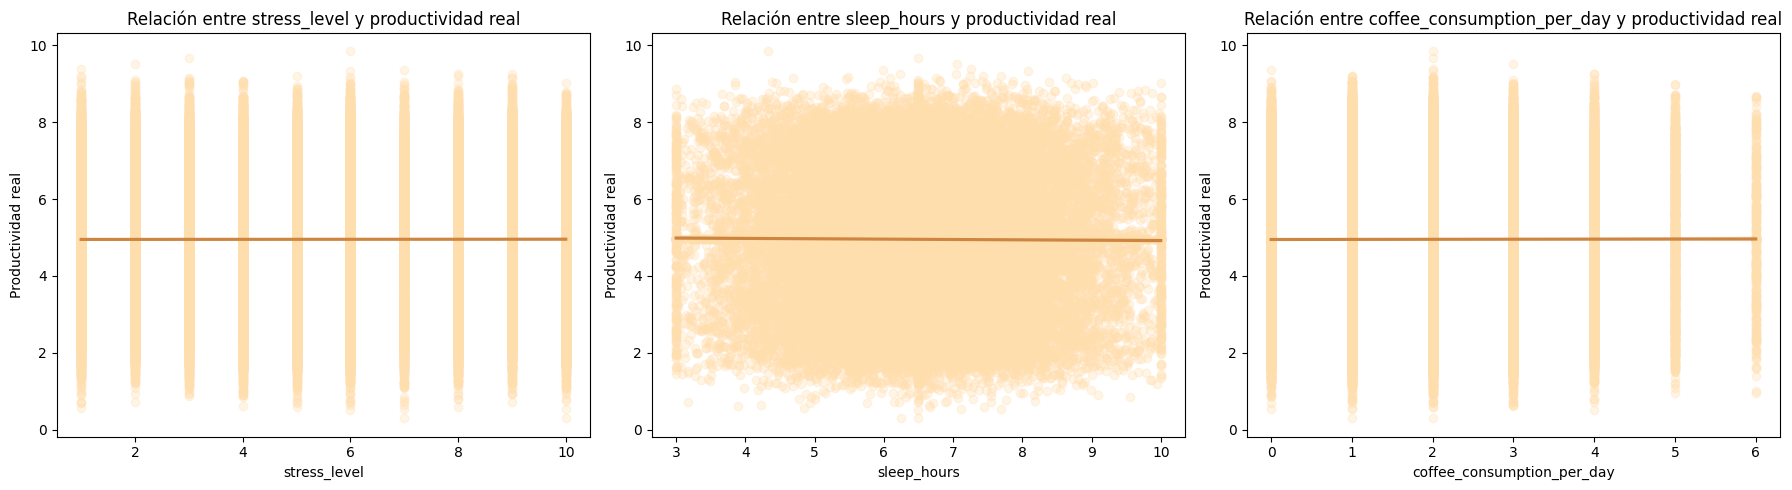

In [23]:
# stress_level, sleep_hours, coffee_consumption_per_day vs actual_productivity_score (cuantitativas)
# "Altos niveles de estrés, pocas horas de sueño y elevado consumo de café podrían correlacionarse negativamente con la productividad"

vars_estres = ['stress_level', 'sleep_hours', 'coffee_consumption_per_day']

# Crear figura y ejes: 1 fila, 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(vars_estres):
    ax = axes[i]
    sns.regplot(
        x=var,
        y='actual_productivity_score',
        data=df_limpia,
        scatter_kws={'alpha': 0.3, 'color': 'navajowhite'},
        line_kws={'color': 'peru'},
        ax=ax
    )
    ax.set_title(f'Relación entre {var} y productividad real')
    ax.set_xlabel(var)
    ax.set_ylabel('Productividad real')

# Ajustar diseño
plt.tight_layout()
plt.show()


* **Estrés**: La línea de regresión es prácticamente plana, lo que indica poca o ninguna relación lineal entre el nivel de estrés percibido y la productividad real. No se observa una asociación clara entre más estrés y menor productividad en esta muestra

* **Horas de sueño**: La línea de regresión nuevamente es casi horizontal, lo cual sugiere muy baja correlación entre sueño y productividad real. as horas de sueño no parecen explicar la variación en la productividad, al menos de forma lineal. Tal vez existan relaciones no lineales (ej. dormir muy poco o demasiado afecta).

* **Consumo de café**: Como en los otros casos, la línea es plana,sin evidencia de relación lineal clara entre el consumo de café y la productividad. No se observa que más café se asocie con más o menos productividad real.



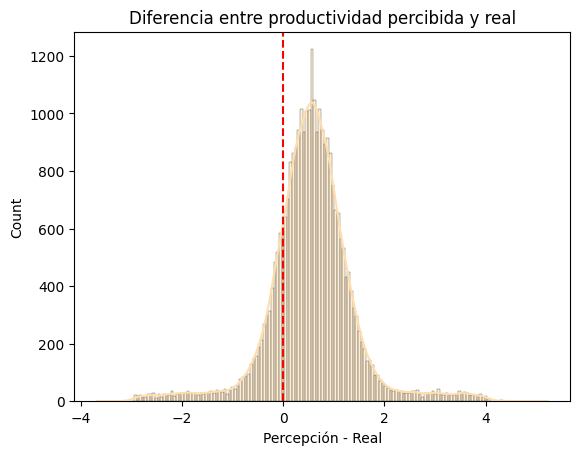

Diferencia promedio: 0.56


In [24]:
#perceived_productivity_score vs actual_productivity_score
#"Las personas tienden a sobreestimar su rendimiento, mostrando diferencias importantes entre ambas métricas"

# Diferencia
df_limpia['dif_productividad'] = df_limpia['perceived_productivity_score'] - df_limpia['actual_productivity_score']

# Histograma de la diferencia
sns.histplot(df_limpia['dif_productividad'], kde=True, color='navajowhite')
plt.axvline(0, color='red', linestyle='--')
plt.title('Diferencia entre productividad percibida y real')
plt.xlabel('Percepción - Real')
plt.show()

# Promedio de diferencia
prom_dif = df_limpia['dif_productividad'].mean()
print(f"Diferencia promedio: {prom_dif:.2f}")

#Scatter plot


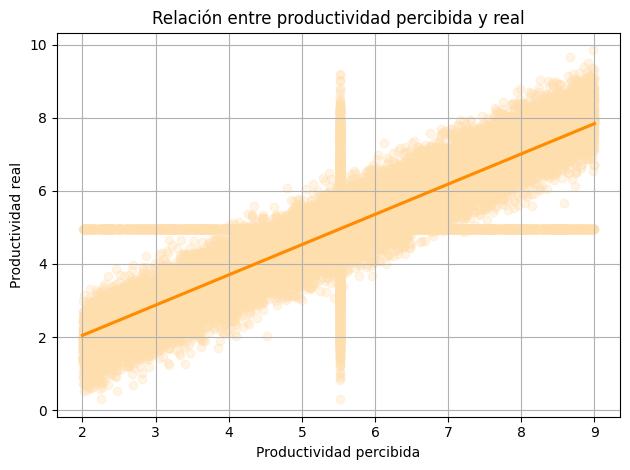

In [25]:
# Scatter plot con regresión
sns.regplot(
    x='perceived_productivity_score',
    y='actual_productivity_score',
    data=df_limpia,
    scatter_kws={'alpha': 0.3, 'color': 'navajowhite'},
    line_kws={'color': 'darkorange'}
)

plt.title('Relación entre productividad percibida y real')
plt.xlabel('Productividad percibida')
plt.ylabel('Productividad real')
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusión de ambos gráficos**

Las personas tienden a sobrestimar su productividad, ya que la mayoría de las diferencias entre percepción y realidad son positivas, y la diferencia promedio respalda esta tendencia. Esto podría deberse a sesgos de autoevaluación, falta de feedback, o desconocimiento sobre criterios de productividad real.

Se ve una correlación positiva entre la productividad percibida y la productividad real, lo que indica que a mayor percepción de productividad, también tiende a ser mayor la productividad efectivamente registrada.

Sin embargo, la dispersión de puntos (especialmente por debajo de la línea de tendencia) sugiere que muchas personas sobreestiman su rendimiento: para un mismo nivel de productividad percibida, hay casos con productividad real más baja

## **Análisis multivariado**

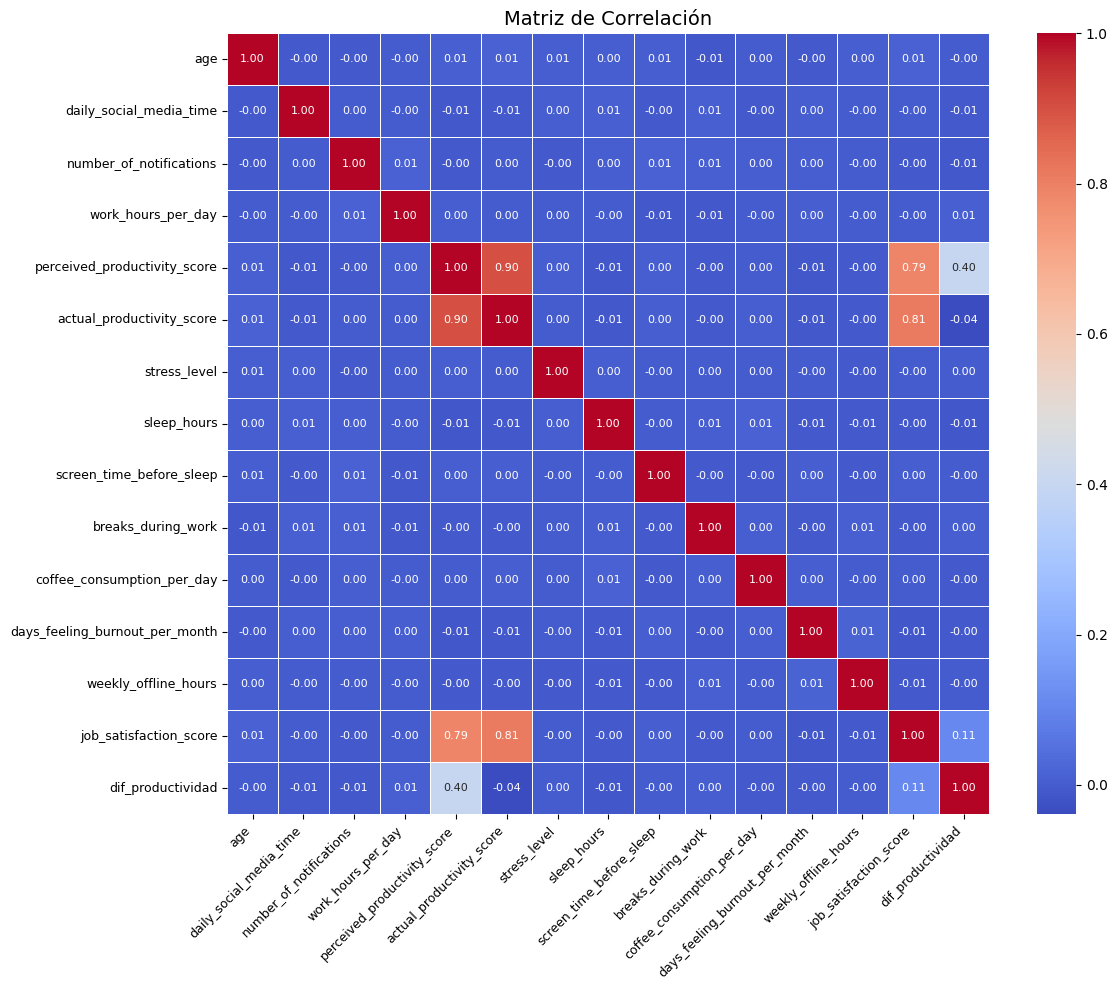

In [26]:
# Matriz de correlación
# Filtrar solo columnas numéricas (evita errores si hay columnas categóricas)
numericas = df_limpia.select_dtypes(include='number')

# Calcular matriz de correlación
correlation_matrix = numericas.corr()

# Tamaño de la figura
plt.figure(figsize=(12, 10))  # Ajustá el tamaño según necesites

# Mapa de calor
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Para limitar a dos decimales
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 8}  # Tamaño de los números
)

# Título
plt.title('Matriz de Correlación', fontsize=14)

# Rotar etiquetas
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)

# Mostrar gráfico
plt.tight_layout()
plt.show()


* **Relación entre productividad percibida y real:** Tienen una alta correlación positiva (0.90).  En principio indica que las personas que se perciben como productivas, en general, también lo son

* **Satisfacción laboral y productividad:** Tiene una fuerte correlación con la productividad real (0.81) y también con la percibida (0.79). Esto sugiere que mayor satisfacción en el trabajo está asociada con mayor productividad.



In [27]:
#En primer lugar crearé una variable categórica ordinal que permita establecer orden en los scores de productividad real
# Como actual_productivity_score recorre desde 0 a 10, podemos establecer 3 niveles: bajo, medio , alto

prod_cat = pd.cut(df_limpia['actual_productivity_score'],
                  bins=[0, 3, 7, 10],
                  labels=['Baja', 'Media', 'Alta'])


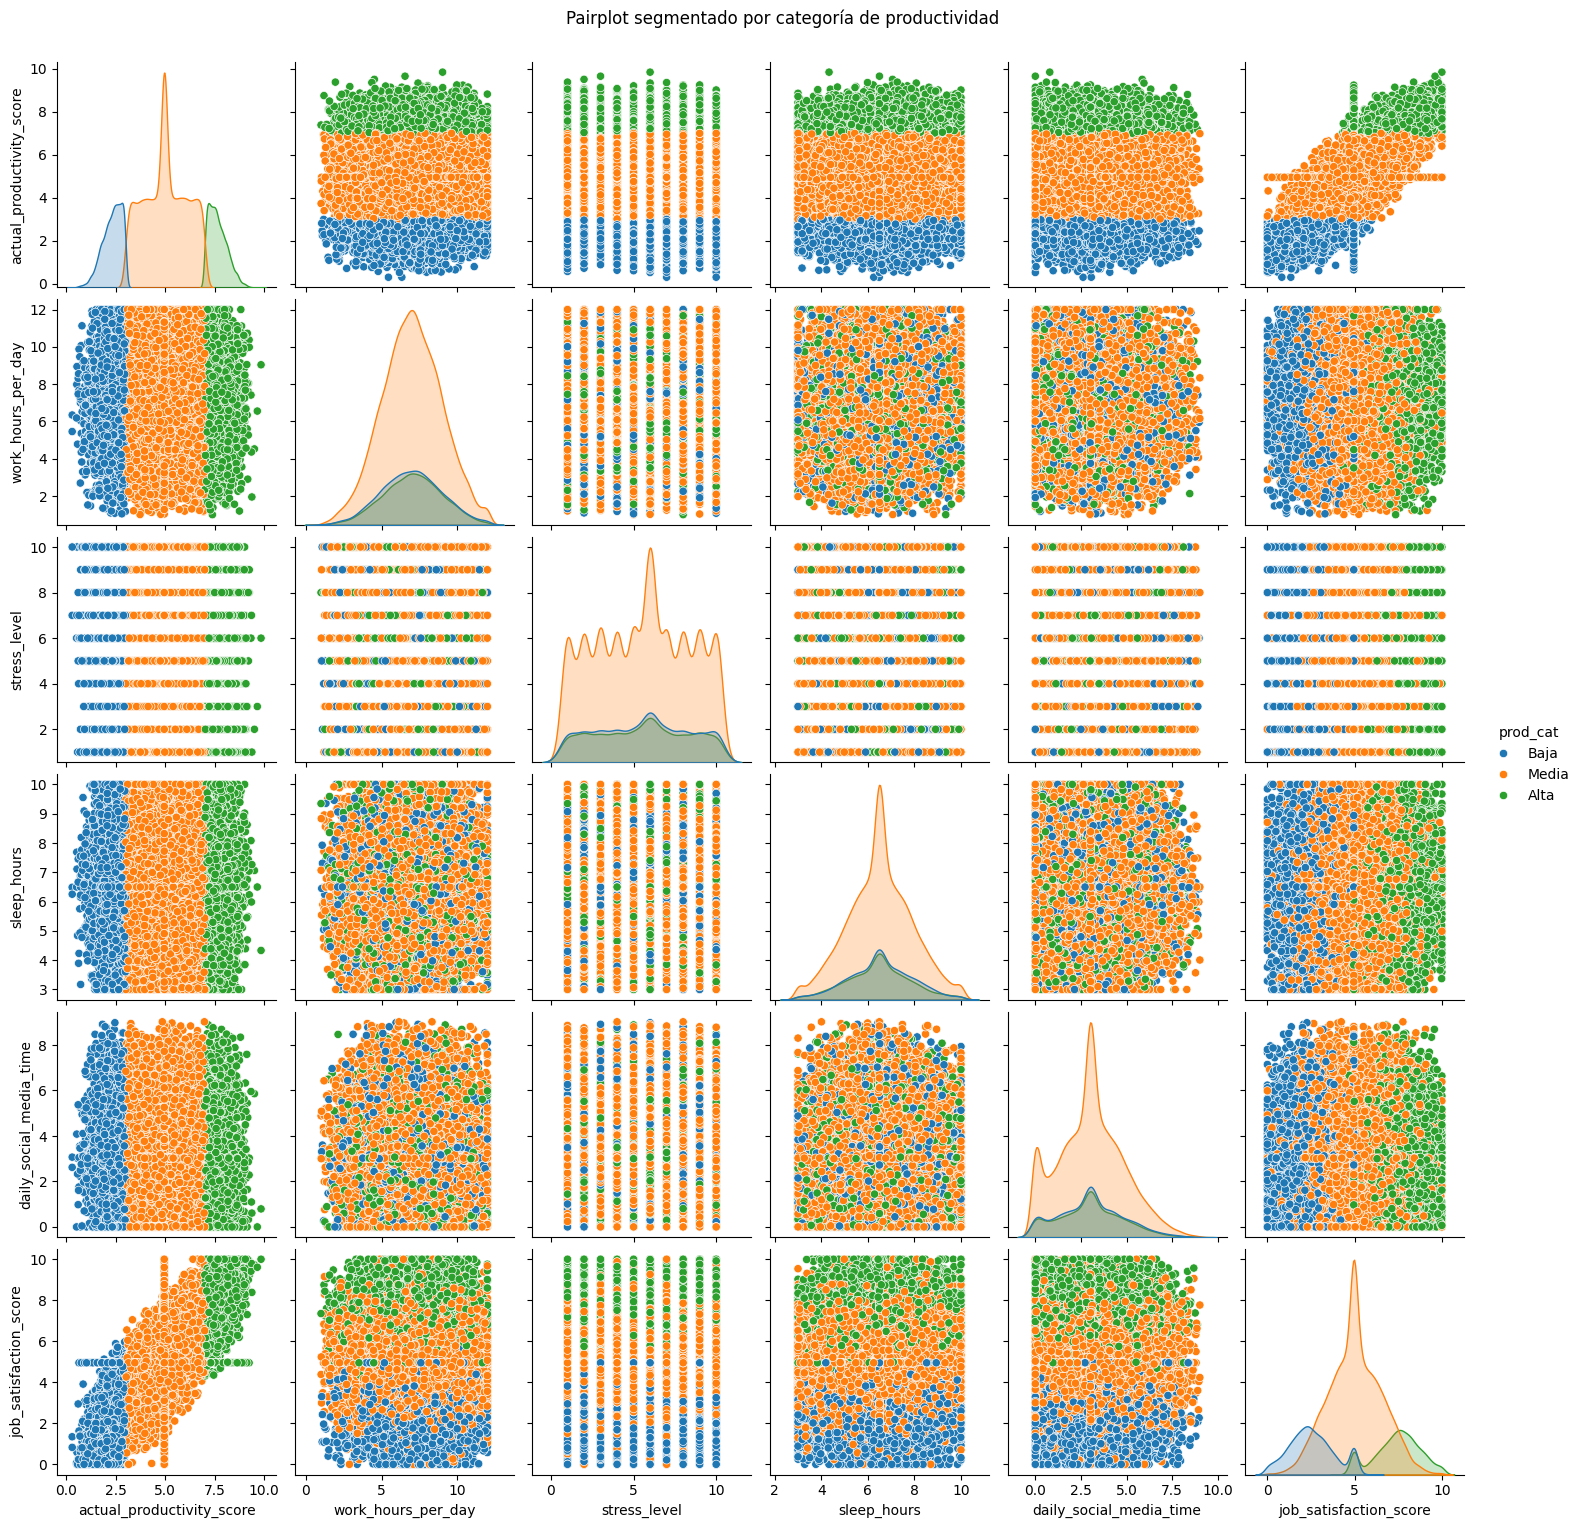

In [28]:
#pairplot

# variables de interés
vars_interes = [
    'actual_productivity_score',
    'work_hours_per_day',
    'stress_level',
    'sleep_hours',
    'daily_social_media_time',
    'job_satisfaction_score'
]

# Crear una copia temporal del DataFrame con prod_cat agregado
df_temp = df_limpia[vars_interes].copy()
df_temp['prod_cat'] = prod_cat

# Pairplot
sns.pairplot(df_temp, hue='prod_cat')
plt.suptitle('Pairplot segmentado por categoría de productividad', y=1.02)
plt.show()


# **Preprocesamiento de datos**

**Codificación de variables categóricas**

In [29]:
from sklearn.preprocessing import LabelEncoder


print(vars_cat)

#Variable Género: Dado que gender tiene 3 valores distintos, sera codificada con OneHotEncoder manual usando pandas
df_limpia = pd.get_dummies(df_limpia, columns=['gender'], drop_first=True)

# Codificar con LabelEncoder las variables restantes de vars_cat(sin genre).
# Se crea un diccionario de con el fin de guardar los datos y revertir de ser necesario para interpretar valores originales
vars_cat_restantes = ['job_type', 'social_platform_preference']
label_encoders = {}
diccionario_referencia = {}

# Codificar y guardar referencia
for cat in vars_cat_restantes:
    le = LabelEncoder()
    df_limpia[cat] = le.fit_transform(df_limpia[cat])
    diccionario_referencia[cat] = dict(zip(le.transform(le.classes_), le.classes_))


['gender', 'job_type', 'social_platform_preference']


In [30]:
#diccionario_referencia
for cat, mapping in diccionario_referencia.items():
    print(f"\n{cat}")
    for k, v in mapping.items():
        print(f"  {k} → {v}")



job_type
  0 → Education
  1 → Finance
  2 → Health
  3 → IT
  4 → Student
  5 → Unemployed

social_platform_preference
  0 → Facebook
  1 → Instagram
  2 → Telegram
  3 → TikTok
  4 → Twitter


In [31]:
# Mostrar solo las columnas relacionadas con 'gender'
print(df_limpia.filter(like='gender').head())

"""Dado que use drop_first=True en get_dummies para evitar multicolinealidad, gender = Female no aparecera"""


   gender_Male  gender_Other
0         True         False
1         True         False
2         True         False
3        False         False
4         True         False


'Dado que use drop_first=True en get_dummies para evitar multicolinealidad, gender = Female no aparecera'

In [32]:
#Verificar si impacto la Codificación LaberEncoder
df_limpia[vars_cat_restantes].head()

job_type  social_platform_preference
0         5                           0
1         2                           4
2         1                           4
3         5                           0
4         3                           2

#**Feature Selection**

**Selección de variable objetivo y variables independientes**

In [33]:
#setear mis variables
X = df_limpia.drop(['actual_productivity_score', 'dif_productividad'], axis=1)
y = df_limpia['actual_productivity_score']

#De mis features elimino dif_productividad ya que es una variable calculado a los fines de probar hipótesis gráficamente  y puede sesgarme los modelos.

# **Modelado**

**Librerias necesarias para implementar los modelos**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold


model_rg = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=24)


### **División de datos en conjuntos de entrenamiento y prueba**

In [35]:
#dividir y entrenar: 80% entrenar, 20% testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

### **Entrenar modelos**

In [36]:
# Entrenar
model_rg.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=24)

### **Predicción con conjunto de prueba**

In [37]:
#Predecir
y_pred_rg = model_rg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

## **Evaluación del rendimiento del modelo**

In [38]:
#Evaluar resultados
def print_metrics(y_true, y_pred, model_name):
    print(f"Resultados para {model_name}:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2:", r2_score(y_true, y_pred))
    print()

print_metrics(y_test, y_pred_rg, "Regresión Lineal")
print_metrics(y_test, y_pred_rf, "Random Forest")

Resultados para Regresión Lineal:
MAE: 0.5086008917426448
MSE: 0.5207809843461888
RMSE: 0.721651567133467
R2: 0.8407431186243903

Resultados para Random Forest:
MAE: 0.504534811691003
MSE: 0.48065559770223976
RMSE: 0.6932932984691542
R2: 0.8530136202997318



In [39]:
# Crear DataFrame para Regresión Lineal
df_resultados_rg = pd.DataFrame({
    'y_test': y_test.values,
    'y_predicho': y_pred_rg
})

# Crear DataFrame para Random Forest
df_resultados_rf = pd.DataFrame({
    'y_test': y_test.values,
    'y_predicho': y_pred_rf
})

print("------------------Regresión Lineal------------------")
print(df_resultados_rg.head())

print("\n------------------Random Forest------------------")
print(df_resultados_rf.head())

------------------Regresión Lineal------------------
     y_test  y_predicho
0  5.742340    5.819743
1  4.493712    4.936851
2  5.039052    4.428777
3  6.998729    6.452926
4  6.268610    6.070478

------------------Random Forest------------------
     y_test  y_predicho
0  5.742340    5.592739
1  4.493712    5.016533
2  5.039052    4.297854
3  6.998729    6.261356
4  6.268610    6.269122


### **Rendimiento de los modelos - Gráficas**

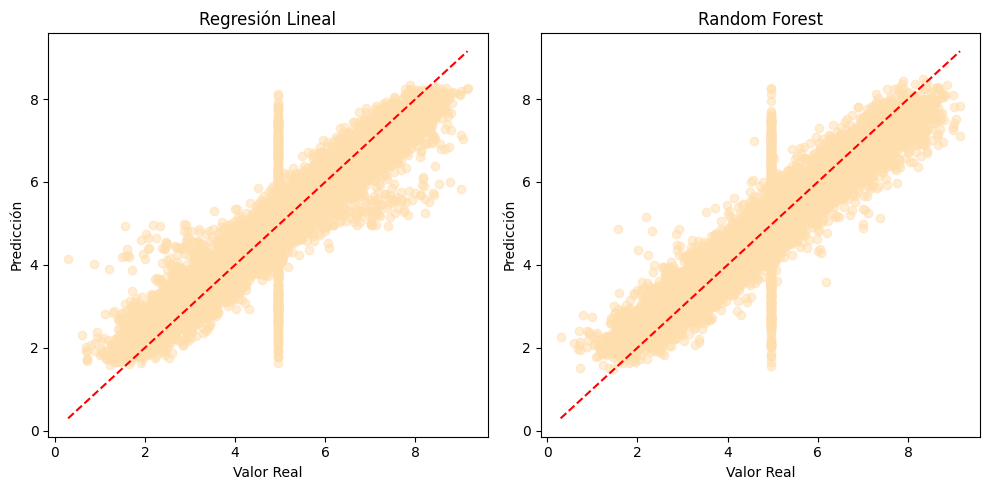

In [40]:
#Graficas y_test vs y_pred de ambos modelos para eveluar predicciones gráficamente
# Son 2 gráficos uno al lado del otro (1 fila, 2 columnas)

plt.figure(figsize=(10, 5))

# Regresión Lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rg, alpha=0.5, color='navajowhite')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Regresión Lineal")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='navajowhite')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")

plt.tight_layout()
plt.show()


### **Evaluar la capacidad de generalización del modelo - Regresión Lineal**

In [41]:
# Coeficientes del modelo lineal

# para ello recordar la función de la reg. lineal: y=β0+β1x1+β2x2+.....+βnxn
# β0:ordenada al origen
# β1...βn: los coeficientes de las variables: indican cuánto cambia Y cuando una variable(x1....xn),aumenta en una unidad, manteniendo todas las demás constantes
# x1...xn: mis variables predictores


coef = model_rg.coef_

df_coef = pd.DataFrame({
    'variable': X.columns,
    'coeficiente': coef
}).sort_values(by='coeficiente', key=abs, ascending=False)

print(df_coef)

                          variable  coeficiente
6     perceived_productivity_score     0.640460
16          job_satisfaction_score     0.229119
18                    gender_Other    -0.009462
17                     gender_Male     0.006611
9         screen_time_before_sleep     0.005494
11                 uses_focus_apps     0.004992
12   has_digital_wellbeing_enabled    -0.004072
8                      sleep_hours     0.002561
3       social_platform_preference     0.002249
5               work_hours_per_day    -0.002007
10              breaks_during_work    -0.000984
4          number_of_notifications     0.000983
13      coffee_consumption_per_day     0.000754
2          daily_social_media_time    -0.000610
1                         job_type     0.000578
7                     stress_level     0.000472
14  days_feeling_burnout_per_month    -0.000275
15            weekly_offline_hours     0.000171
0                              age     0.000147


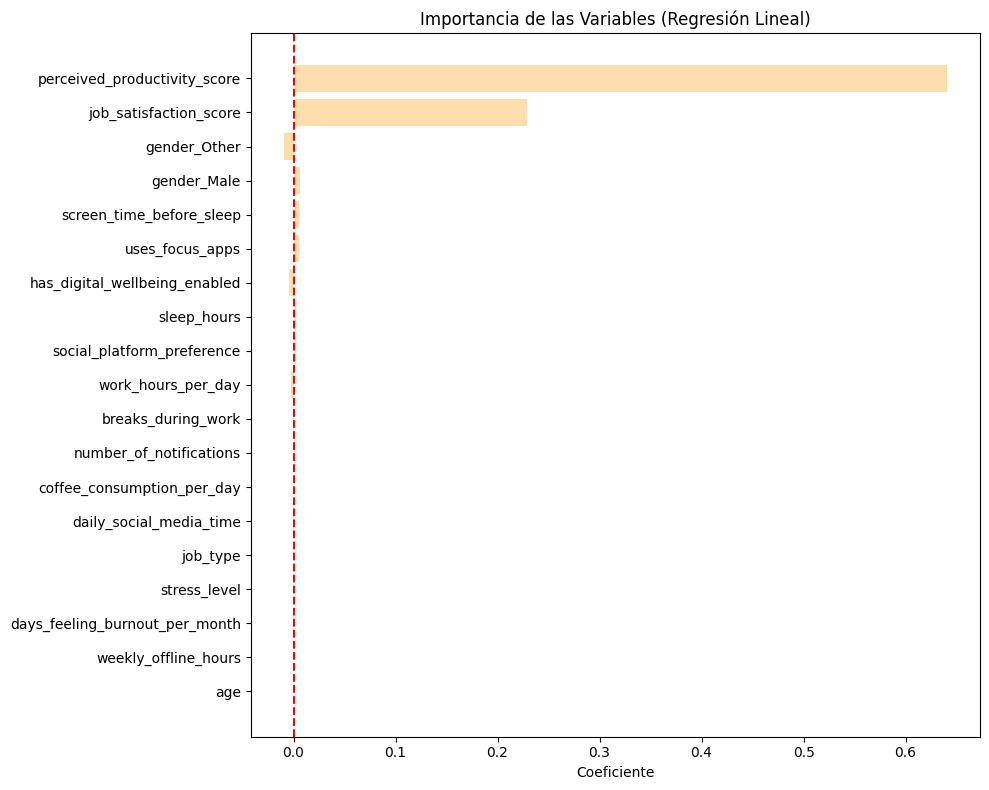

In [62]:
# Gráfico horizontal de coeficientes
plt.figure(figsize=(10, 8))
plt.barh(df_coef['variable'], df_coef['coeficiente'], color='navajowhite')
plt.xlabel('Coeficiente')
plt.title('Importancia de las Variables (Regresión Lineal)')
plt.axvline(x=0, color='red', linestyle='--') 
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### **Evaluar la capacidad de generalización del modelo - Random Forest**

In [42]:
# Obtener importancia de las variables
importances = model_rf.feature_importances_

# Asociar los nombres de las columnas
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print(feature_importance)


perceived_productivity_score      0.828201
job_satisfaction_score            0.056265
work_hours_per_day                0.012632
sleep_hours                       0.012547
weekly_offline_hours              0.011448
daily_social_media_time           0.011008
screen_time_before_sleep          0.010976
age                               0.009728
number_of_notifications           0.009584
days_feeling_burnout_per_month    0.008753
breaks_during_work                0.006022
stress_level                      0.005909
job_type                          0.004439
coffee_consumption_per_day        0.004416
social_platform_preference        0.003755
uses_focus_apps                   0.001269
gender_Male                       0.001259
has_digital_wellbeing_enabled     0.001177
gender_Other                      0.000612
dtype: float64


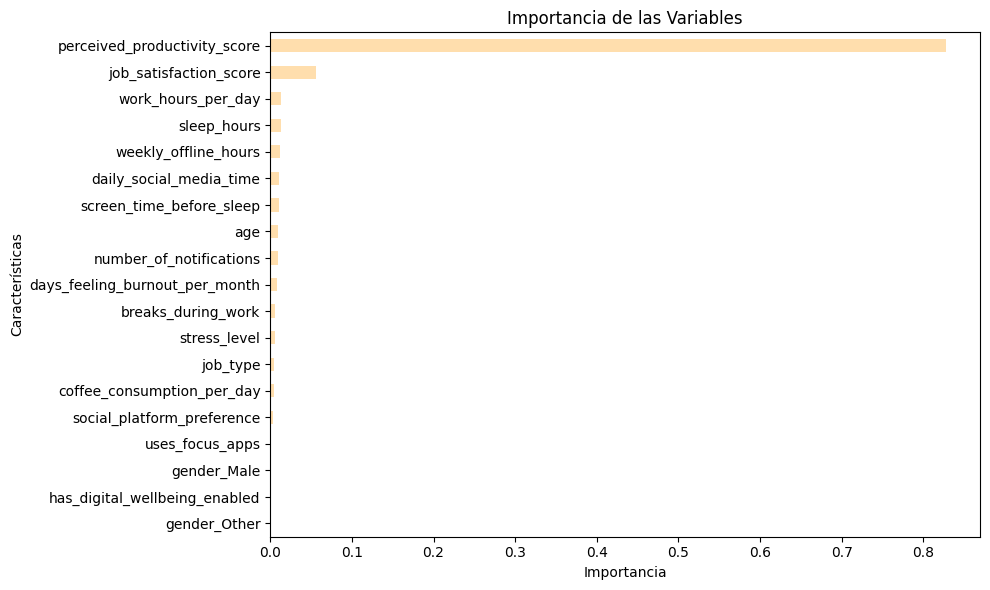

In [ ]:
#Gráfico de barras sobre la importancia de las variables
#Claramente perceived_productivity_score es la variable mas importante, por lo cual se realizará un grafico para evaluar las restantes sin ella.

#variables totales
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh',color='navajowhite')
plt.title('Importancia de las Variables')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

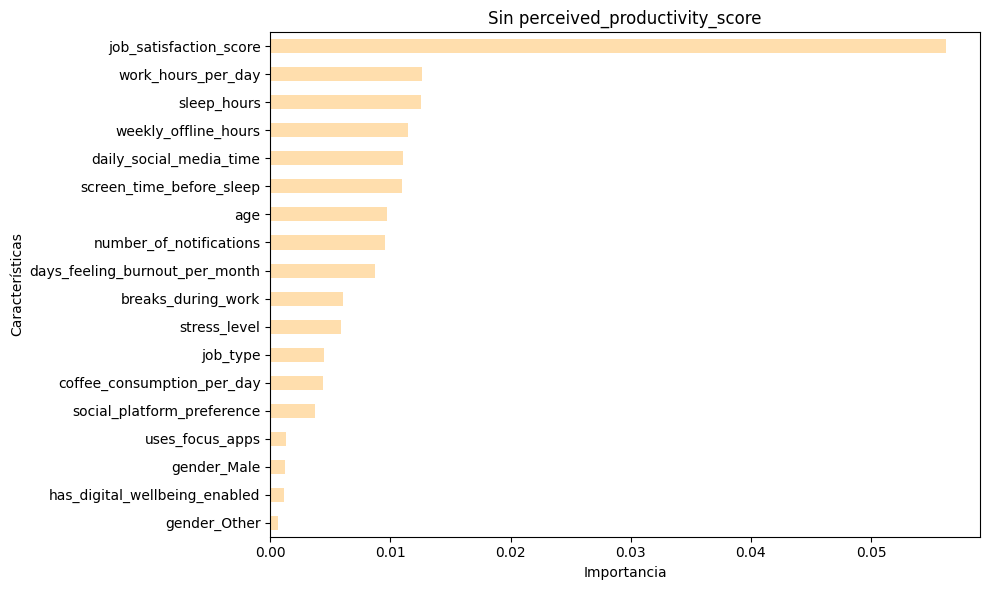

In [60]:
#variables totales
plt.figure(figsize=(10, 6))
feature_importance_sin_pps = feature_importance.drop('perceived_productivity_score')
feature_importance_sin_pps.sort_values().plot(kind='barh',color='navajowhite')
plt.title('Sin perceived_productivity_score')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

#### **Validación cruzada para Regresión Lineal**

In [43]:
# definir validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=24)

# Crear scorer para RMSE (Esto porque no viene prefedinio y make_scorer necesita una función)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Diccionario de métricas
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R2': 'r2'
}
# Ejecutar validación cruzada
resultados_cv_rg = cross_validate(model_rg, X, y, scoring=scoring, cv=cv, return_train_score=True)

# Mostrar promedio y valores individuales
print("----- Regresión Lineal (CV) -----")
for metrica in scoring.keys():
    valores = resultados_cv_rg[f'test_{metrica}']
    print(f"{metrica}:")
    print(f"  Valores individuales: {np.round(valores, 4)}")
    print(f"  Promedio: {np.mean(valores):.4f}")

----- Regresión Lineal (CV) -----
MAE:
  Valores individuales: [0.5086 0.5245 0.5118 0.5026 0.5095]
  Promedio: 0.5114
MSE:
  Valores individuales: [0.5208 0.5662 0.5291 0.5134 0.5343]
  Promedio: 0.5328
RMSE:
  Valores individuales: [0.7217 0.7525 0.7274 0.7165 0.731 ]
  Promedio: 0.7298
R2:
  Valores individuales: [0.8407 0.8272 0.8371 0.8434 0.8361]
  Promedio: 0.8369


#### **Validación cruzada para Random Forest**

In [ ]:
#ATENCION: Demora aprox 5 mins en colab en ejecutar!!

# Ejecutar validación cruzada
resultados_cv_rf = cross_validate(model_rf, X, y, scoring=scoring, cv=cv, return_train_score=True)

# Mostrar promedio y valores individuales
print("----- Random Forest (CV) -----")
for metrica in scoring.keys():
    valores = resultados_cv_rf[f'test_{metrica}']
    print(f"{metrica}:")
    print(f"  Valores individuales: {np.round(valores, 4)}")
    print(f"  Promedio: {np.mean(valores):.4f}")

----- Random Forest (CV) -----
MAE:
  Valores individuales: [0.5028 0.5219 0.5118 0.4969 0.511 ]
  Promedio: 0.5089
MSE:
  Valores individuales: [0.4776 0.5306 0.4995 0.4699 0.5055]
  Promedio: 0.4966
RMSE:
  Valores individuales: [0.6911 0.7284 0.7068 0.6855 0.711 ]
  Promedio: 0.7045
R2:
  Valores individuales: [0.8539 0.8381 0.8462 0.8567 0.8449]
  Promedio: 0.8480


## **Evaluar overfitting - underfitting**

In [45]:
#Evaluar overfitting - underfitting

# Para Regresión Lineal
y_train_pred_rl = model_rg.predict(X_train)
y_test_pred_rl = model_rg.predict(X_test)

mse_train_rl = mean_squared_error(y_train, y_train_pred_rl)
mse_test_rl = mean_squared_error(y_test, y_test_pred_rl)

r2_train_rl = r2_score(y_train, y_train_pred_rl)
r2_test_rl = r2_score(y_test, y_test_pred_rl)

print("------ Regresión Lineal ------")
print(f"Train MSE: {mse_train_rl:.4f} | Test MSE: {mse_test_rl:.4f}")
print(f"Train R² : {r2_train_rl:.4f} | Test R² : {r2_test_rl:.4f}")

# Para Random Forest
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("------ Random Forest ------")
print(f"Train MSE: {mse_train_rf:.4f} | Test MSE: {mse_test_rf:.4f}")
print(f"Train R² : {r2_train_rf:.4f} | Test R² : {r2_test_rf:.4f}")


------ Regresión Lineal ------
Train MSE: 0.5348 | Test MSE: 0.5208
Train R² : 0.8363 | Test R² : 0.8407
------ Random Forest ------
Train MSE: 0.0701 | Test MSE: 0.4807
Train R² : 0.9785 | Test R² : 0.8530


##  Conclusión sobre el modelado y las métricas

Dado a lo expresado en el *objetivo*, se procedió a comparar distintos modelos predictivos.

Se evaluaron dos enfoques:

- **Regresión Lineal**, como modelo base, simple e interpretable.
- **Random Forest Regressor**, un modelo de ensamble no lineal, robusto ante outliers e interacciones complejas.

Ambos modelos fueron evaluados mediante métricas como **MAE**, **MSE**, **RMSE** y **R²**, tanto en una única partición de test como mediante **validación cruzada con 5 folds**.

###  Resultados destacados:

Los resultados finales, evaluados con una partición de entrenamiento y prueba (train-test split), mostraron que:

- La **Regresión Lineal** alcanzó un R² en test de **0.8407**, con un RMSE de **0.7216**.
- El modelo de **Random Forest** logró un mejor desempeño, con un R² de **0.8530** y un RMSE de **0.6932**, mostrando una mayor capacidad para capturar relaciones complejas en los datos.

| Métrica  | Regresión Lineal | Random Forest |
|----------|------------------|----------------|
| MAE      | 0.5086           | 0.5045         |
| MSE      | 0.5207           | 0.4806         |
| RMSE     | 0.7216           | 0.6933         |
| R²       | 0.8407           | 0.8530         |

Además, los resultados fueron consistentes al aplicar **validación cruzada (5 folds)**, lo que reafirma la robustez del modelo y su capacidad de generalización.

También se analizaron los resultados en entrenamiento y test para detectar **overfitting**. Si bien Random Forest presentó un **R² muy alto en entrenamiento (≈0.978)**, su desempeño en test siguió siendo elevado (**R² ≈ 0.853**), lo que indica un **ligero sobreajuste esperable pero aceptable**.

### Conclusión sobre modelos:

Los resultados respaldan la elección de **Random Forest como modelo final**, debido a su mejor desempeño general. Esto abre la posibilidad de seguir mejorando mediante:
- Ajuste de **hiperparámetros**.

El modelo final permitira comprender mejor los factores que influyen en la productividad, combinando mayor precisión y robustez analítica.


# **Optimización del modelo elegido**

* **Hiperparámetros de RandomForestRegressor:**

  - **n_estimators**: Número de árboles en el bosque; más árboles suelen mejorar la precisión pero aumentan el tiempo de cómputo.  
  - **max_depth**: Profundidad máxima de cada árbol; controla el tamaño del árbol para evitar sobreajuste.  
  - **min_samples_split**: Mínimo número de muestras necesarias para dividir un nodo; ayuda a evitar divisiones que generen nodos muy pequeños.  
  - **min_samples_leaf**: Mínimo número de muestras que debe tener una hoja; garantiza que las hojas no sean demasiado pequeñas y reduce el sobreajuste.  
  - **max_features**: Número máximo de características consideradas para dividir en cada nodo; limita la cantidad de variables usadas en cada árbol para aumentar la diversidad.

  Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html



Debido a que quiero probar varias combinaciones de hiperparámetros, usare Random Search para mitigir el efecto costo computacional

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

#Voy a medir el tiempo que tarda en ejecutar(recomendación de clase 29)
tiempo_inicio = time.time()

# Definir espacio de búsqueda
parametros_random = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),  
    'min_samples_leaf': randint(1, 5),    
    'max_features': ['sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=parametros_random,
    n_iter=20,              
    cv=cv,
    scoring='r2',
    n_jobs=-1,              
    random_state=24,
    verbose=1
)

# Ejecutar búsqueda
random_search.fit(X_train, y_train)

tiempo_fin = time.time()
tiempo = tiempo_fin - tiempo_inicio
print(f"Tiempo de ejecución: {tiempo / 60:.2f} minutos")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tiempo de ejecución: 0.93 minutos


In [51]:
print("Mejores parámetros:", random_search.best_params_)
print("Mejor score (R²):", random_search.best_score_)


Mejores parámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 200}
Mejor score (R²): 0.8440881286354228


# **Predecir con el mejor modelo encontrado**

In [52]:
# Predecir con el mejor modelo encontrado
mejor_modelo = random_search.best_estimator_
y_pred_mjm = mejor_modelo.predict(X_test)

# Calcular métricas y mostrar
print_metrics(y_test, y_pred_mjm, "Mejor modelo encontrado ajustando hiperparámetros")

Resultados para Mejor modelo encontrado ajustando hiperparámetros:
MAE: 0.514060305510632
MSE: 0.4890521041003961
RMSE: 0.6993226037390727
R2: 0.8504459354886216



# **Breve tabla comparativa entre todos los modelos**

| Métrica  | Regresión Lineal | Random Forest  | Random Forest + Tuning |
|----------|------------------|----------------|------------------------|
| MAE      | 0.5086           | 0.5045         |0.5140
| MSE      | 0.5207           | 0.4806         |0.4890
| RMSE     | 0.7216           | 0.6933         |0.6993
| R²       | 0.8407           | 0.8530         |0.8504

# **Conclusiones Finales**

El objetivo principal de este proyecto fue predecir el nivel de productividad real (actual_productivity_score) de individuos utilizando dos modelos de regresión: regresión lineal múltiple y Random Forest. Para ello, se emplearon variables relacionadas con el uso de redes sociales, notificaciones, horas de sueño, niveles de estrés, pausas laborales, uso de herramientas de enfoque y bienestar digital, entre otras.

**Análisis Exploratorio de Datos**

En una primera instancia, se llevó a cabo un exhaustivo análisis exploratorio de datos (EDA) utilizando las librerías de Python NumPy, Pandas, Matplotlib y Seaborn. Este análisis permitió obtener conclusiones clave sobre la composición y estructura de los datos, así como abordar los objetivos analíticos específicados.

**Modelado y Evaluación**

Tras las tareas de limpieza de datos (gestión de duplicados, valores nulos y outliers) y la codificación de variables categóricas, se procedió al entrenamiento de los dos modelos de regresión: Regresión Lineal Múltiple y Random Forest Regressor.

Para la comparación de los modelos, se utilizaron cuatro métricas de evaluación estándar: Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE) y Coeficiente de Determinación (R²). Además, se implementó una validación cruzada con 5 folds para evaluar la robustez y representatividad de los resultados obtenidos por cada modelo.

El modelo que demostró un mejor rendimiento general fue Random Forest. Posteriormente, se exploró la optimización de este modelo mediante la técnica de Random Search. Sin embargo, es importante destacar que el tuning no produjo mejoras significativas en las métricas de error. Esto sugiere que el modelo Random Forest ya operaba cerca de su óptimo con sus parámetros por defecto, destacando su robustez inherente.

**Verificación de la Hipótesis Principal**

La hipótesis principal de este trabajo se centró en probar que:
*"El tiempo diario dedicado a redes sociales, junto con factores relacionados al bienestar digital (como el uso de aplicaciones de enfoque, nivel de sueño y estrés), impacta significativamente en la productividad real (actual_productivity_score) de los individuos."*

A partir de los resultados obtenidos de ambos modelos, esta hipótesis **no se verifica** de manera contundente como se esperaba. Si bien algunas de estas variables muestran cierta influencia, no son los predictores más dominantes.
A continuación, se presentan los coeficientes (Regresión Lineal) e importancias de las características (Random Forest) que respaldan esta conclusión:

| Variable                          | Regresión Lineal (Coeficiente) | Random Forest (Importancia) |
|----------------------------------|-------------------------------:|-----------------------------:|
| perceived_productivity_score     |                        0.640460 |                    0.828201 |
| job_satisfaction_score           |                        0.229119 |                    0.056265 |
| gender_Other                     |                       -0.009462 |                    0.000612 |
| gender_Male                      |                        0.006611 |                    0.001259 |
| screen_time_before_sleep         |                        0.005494 |                    0.010976 |
| uses_focus_apps                  |                        0.004992 |                    0.001269 |
| has_digital_wellbeing_enabled    |                       -0.004072 |                    0.001177 |
| sleep_hours                      |                        0.002561 |                    0.012547 |
| social_platform_preference       |                        0.002249 |                    0.003755 |
| work_hours_per_day               |                       -0.002007 |                    0.012632 |
| breaks_during_work               |                       -0.000984 |                    0.006022 |
| number_of_notifications          |                        0.000983 |                    0.009584 |
| coffee_consumption_per_day       |                        0.000754 |                    0.004416 |
| daily_social_media_time          |                       -0.000610 |                    0.011008 |
| job_type                         |                        0.000578 |                    0.004439 |
| stress_level                     |                        0.000472 |                    0.005909 |
| days_feeling_burnout_per_month  |                       -0.000275 |                    0.008753 |
| weekly_offline_hours             |                        0.000171 |                    0.011448 |
| age                              |                        0.000147 |                    0.009728 |



Como factores principales que influyen en la productividad, se destaca consistentemente que los empleados con que se perciben mas productivos y su satisfacción laboral es alta, tienden a ser más productivos. Esto sugiere que la percepción individual del propio rendimiento y la satisfacción con el trabajo son predictores mucho más fuertes de la productividad real que las variables relacionadas directamente con el bienestar digital o el uso de redes sociales.